data shape (41201, 64)
labels shape (41201,)


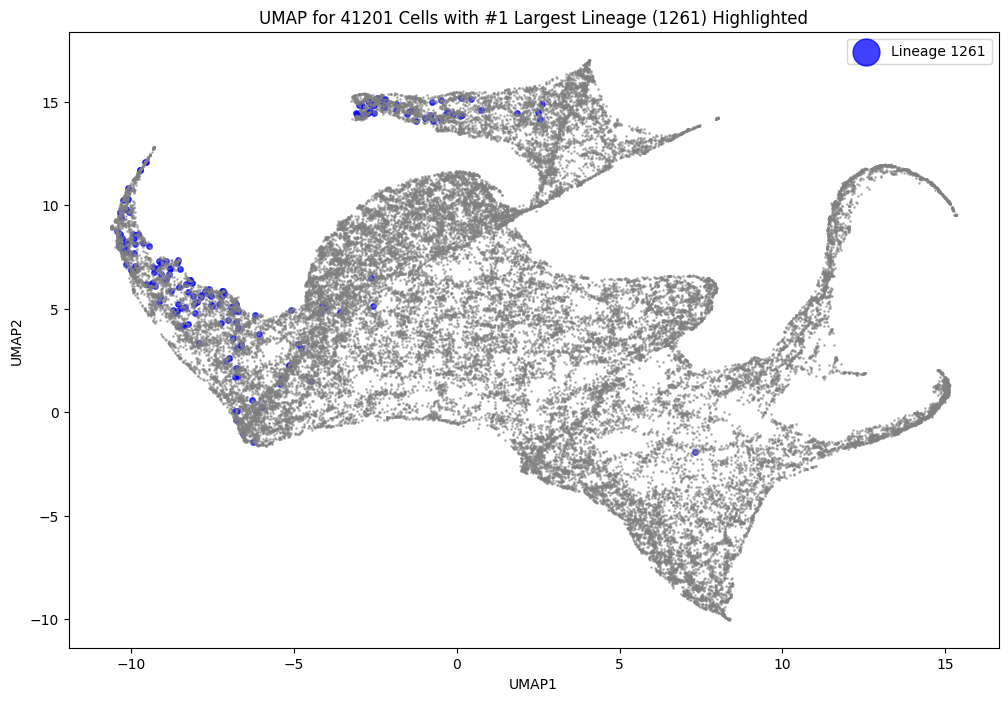

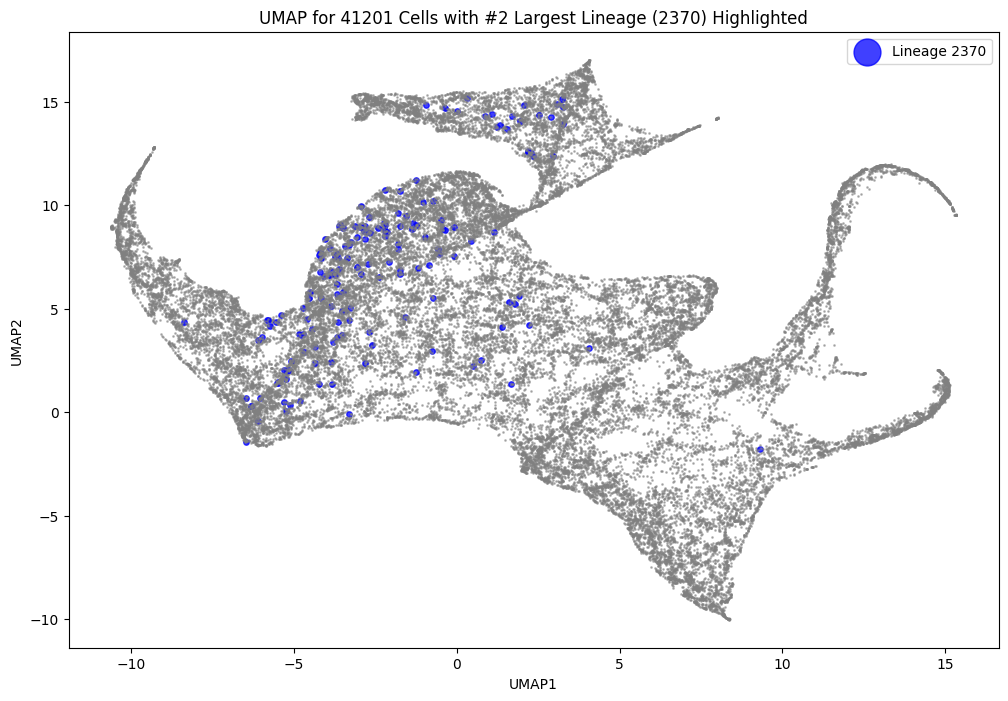

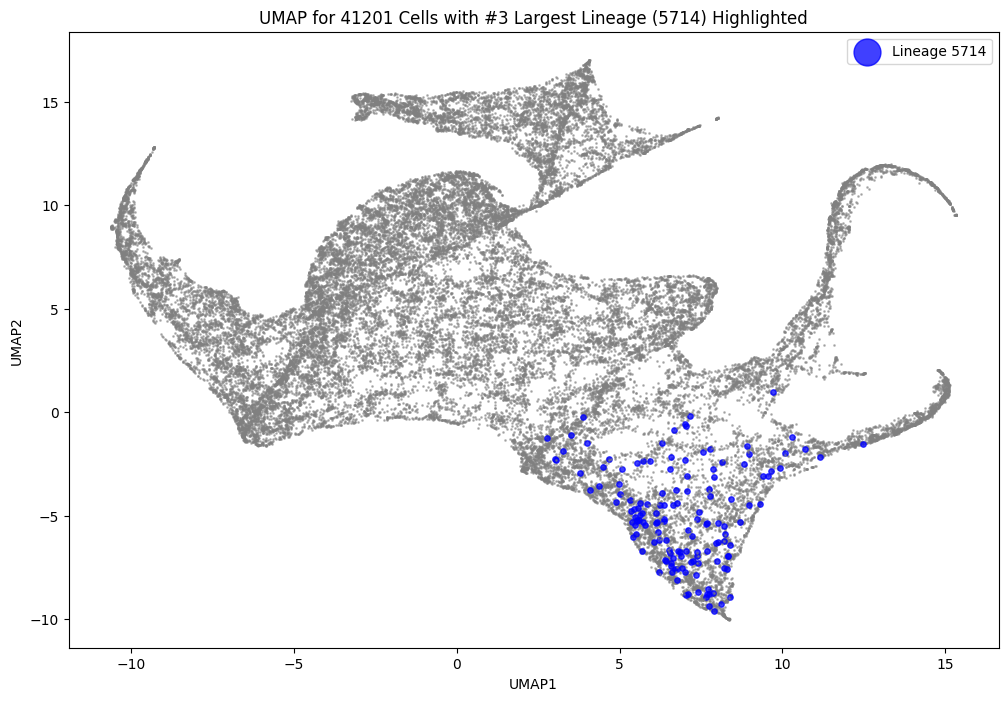

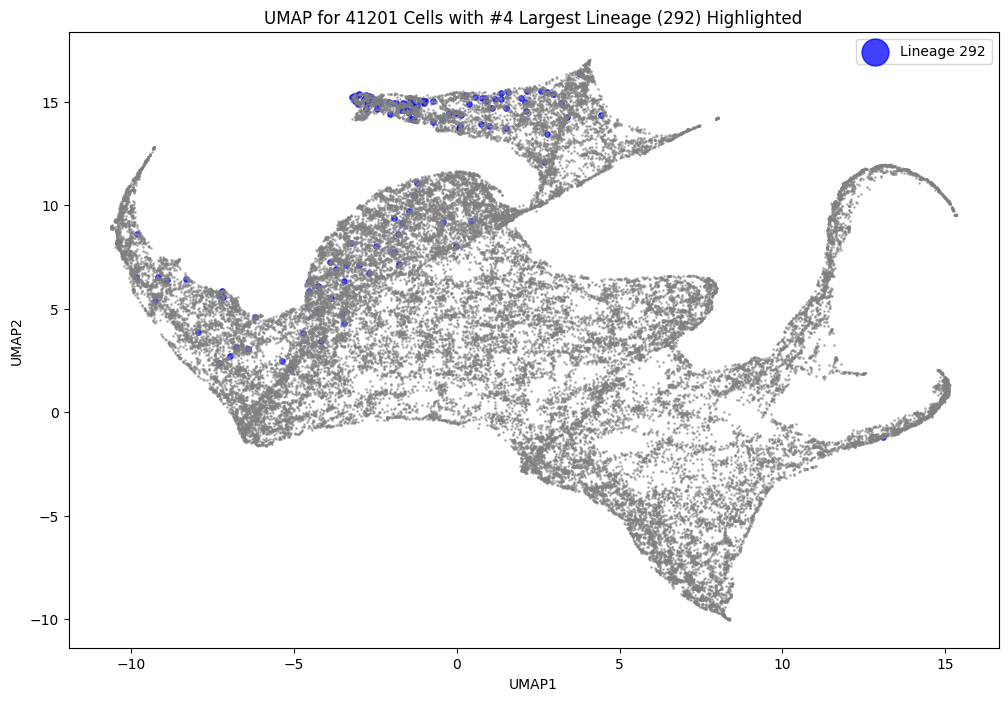

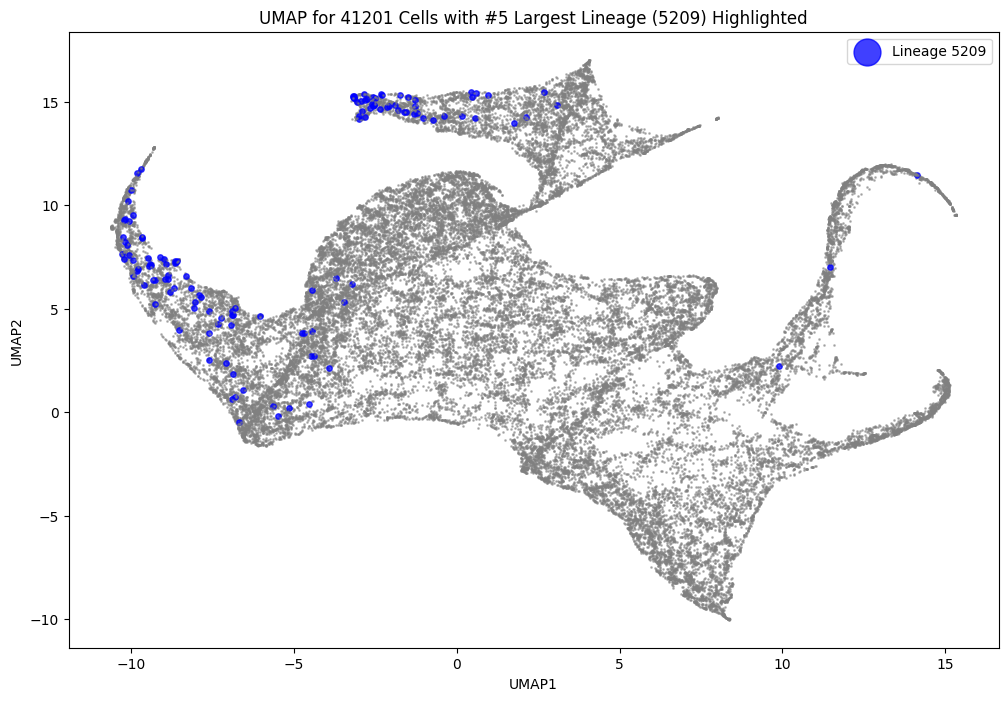

In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt
from collections import Counter
import anndata as ad

input_dir = "out/"
output_dir = ""
num_top_lg_toplot = 5

# Load dataset
data = np.load(input_dir+'scBaseEncoderFeat_Z.npy')
adata_subset = ad.read_h5ad('Larry_41201_2000.h5ad')
labels = adata_subset.obs["clone_id"].to_numpy()
categories = adata_subset.obs['Cell type annotation'].to_numpy()  

print("data shape", data.shape)
print("labels shape", labels.shape)

# Initialize UMAP and fit the datab
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Determine the top lineages

unique_labels, counts = np.unique(labels, return_counts=True)
top_lineages = unique_labels[np.argsort(-counts)[:num_top_lg_toplot]]

default_color = 'gray'

for i, lineage in enumerate(top_lineages):
    plt.figure(figsize=(12, 8))
    for label in np.unique(labels):
        subset = embedding[labels == label]
        if label == lineage:
            plt.scatter(subset[:, 0], subset[:, 1], s=15, label=f"Lineage {label}", alpha=0.75, color= "blue")
        else:
            plt.scatter(subset[:, 0], subset[:, 1], s=1, color=default_color, alpha=0.5)

    plt.title(f'UMAP for 41201 Cells with #{i+1} Largest Lineage ({lineage}) Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(markerscale=5)
    plt.savefig(output_dir + f'cell_umap_{i}_largest_plot.png', dpi=300)
    plt.show()


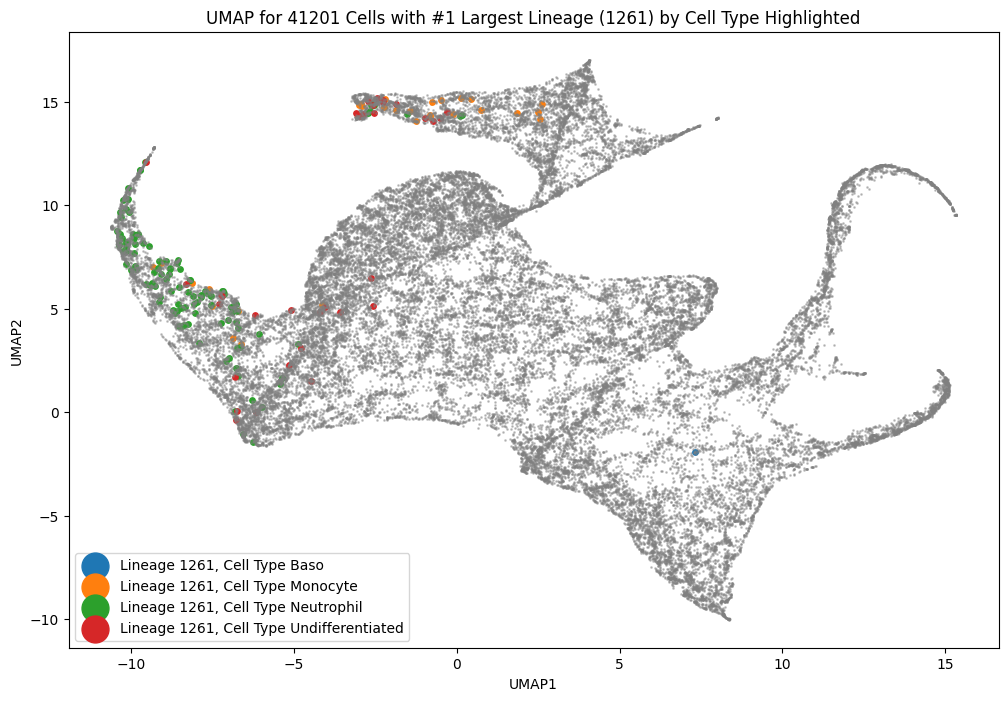

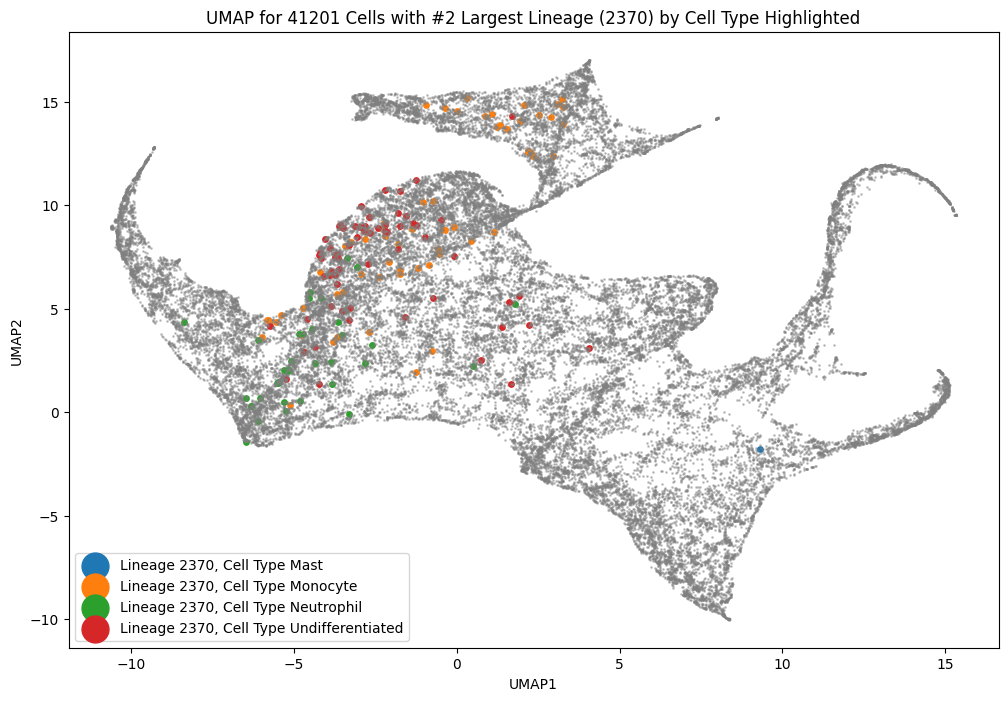

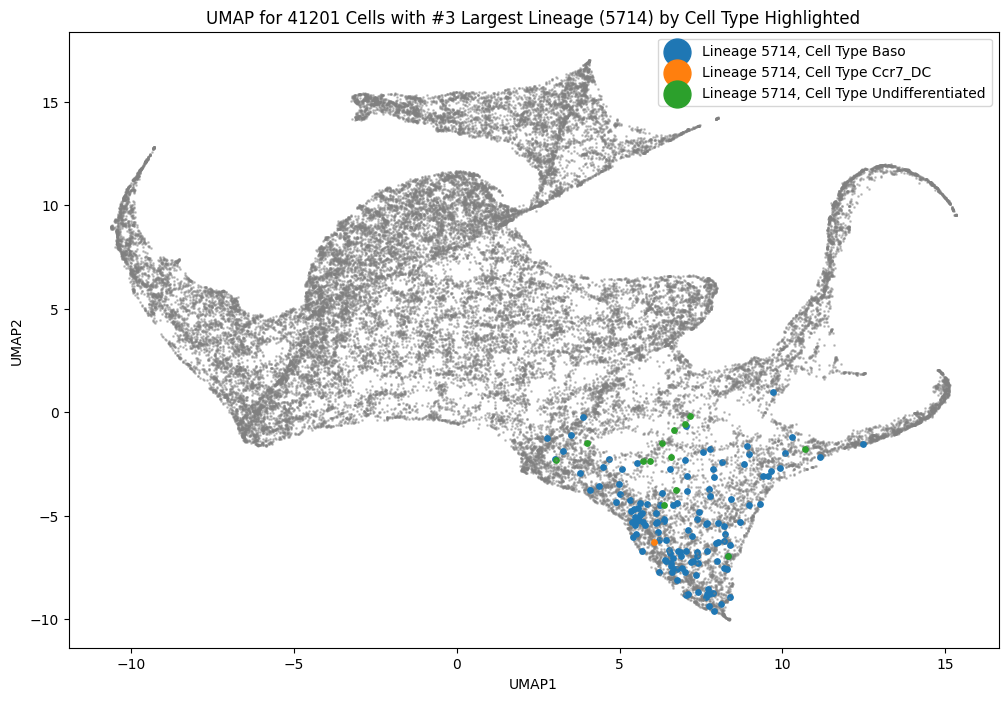

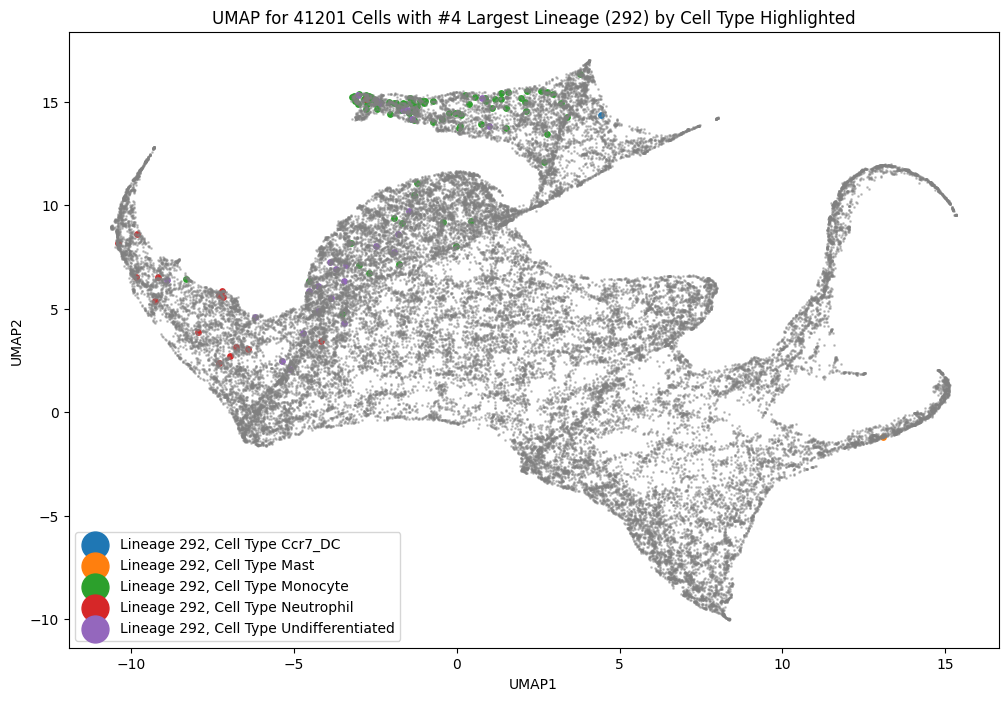

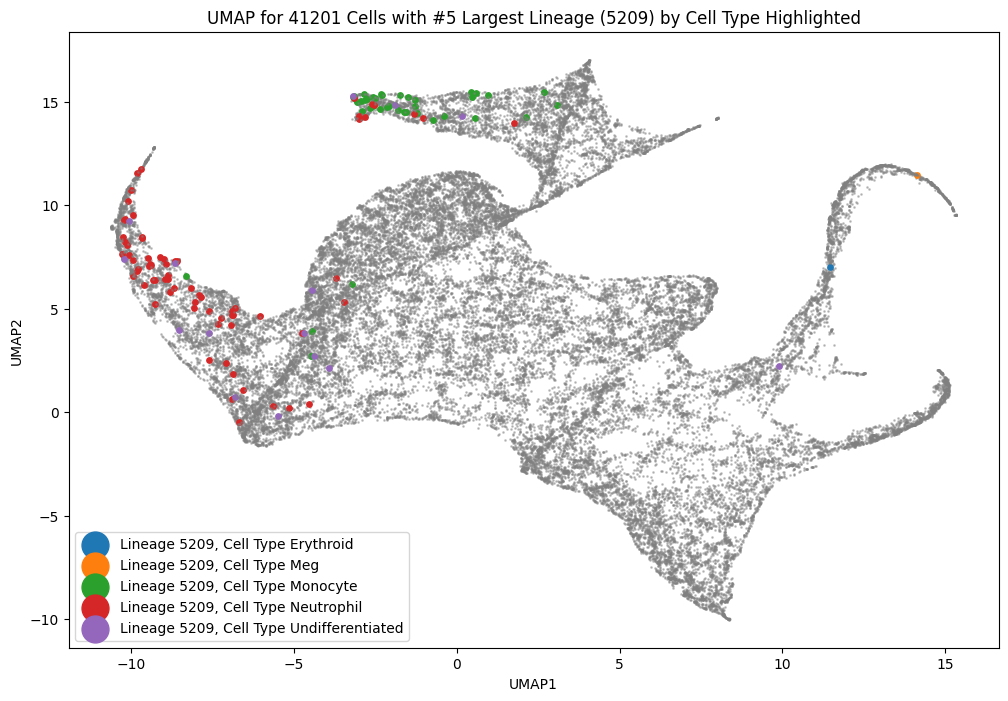

In [2]:
default_color = 'gray'

for i, lineage in enumerate(top_lineages):
    plt.figure(figsize=(12, 8))
    for label in np.unique(labels):
        subset = embedding[labels == label]
        if label == lineage:
            # For the top lineage, color by category
            for category in np.unique(categories[labels == label]):
                category_subset = subset[categories[labels == label] == category]
                plt.scatter(category_subset[:, 0], category_subset[:, 1], s=15, label=f"Lineage {label}, Cell Type {category}", alpha=1)
        else:
            plt.scatter(subset[:, 0], subset[:, 1], s=1, color=default_color, alpha=0.4)

    plt.title(f'UMAP for 41201 Cells with #{i+1} Largest Lineage ({lineage}) by Cell Type Highlighted')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(markerscale=5)
    plt.savefig(output_dir + f'cell_umap_{i}_largest_plot_by_CellType.png', dpi=300)
    plt.show()
